In [1]:
import torch 
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
print("Number of names: ", len(words))
print("Length of shortest name: ", min(len(w) for w in words))
print("Length of longest name: ", max(len(w) for w in words))

Number of names:  32033
Length of shortest name:  2
Length of longest name:  15


In [5]:
print(max(words, key=len))

muhammadibrahim


In [6]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [7]:
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]): 
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        

In [8]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [9]:
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}



In [10]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [11]:

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):  
        lx1 = stoi[ch1]
        lx2 = stoi[ch2]
        N[lx1, lx2] += 1 


In [12]:
N.shape

torch.Size([27, 27])

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

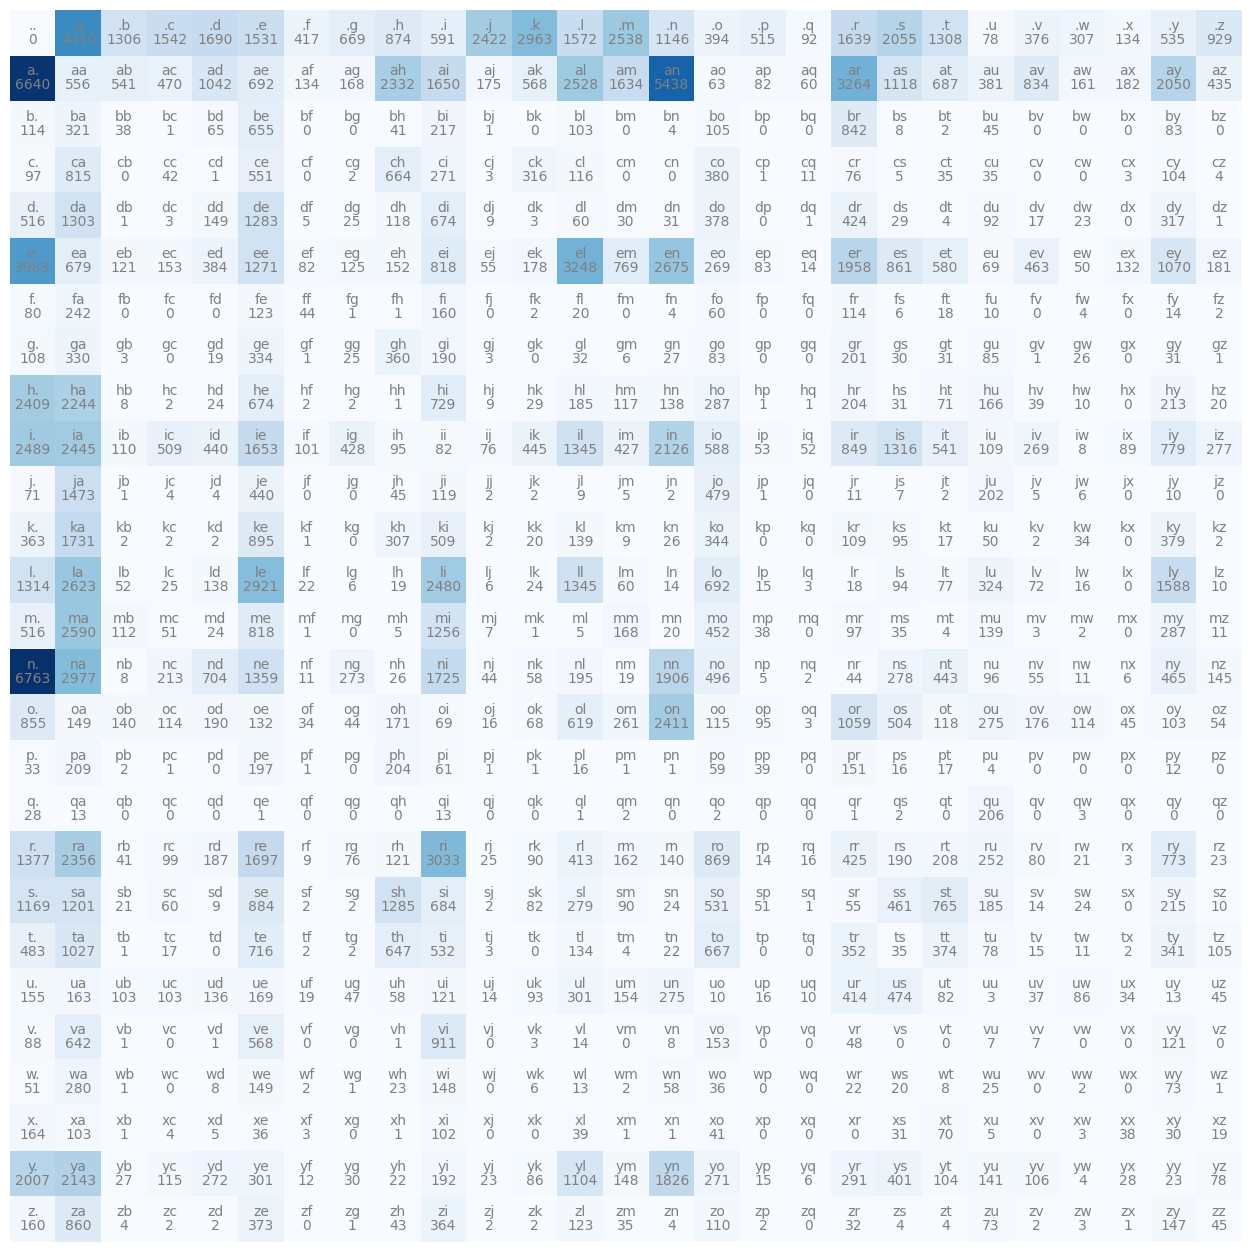

In [13]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')


In [21]:
p = N.float() / N.sum()
p


tensor([[0.0000e+00, 1.9330e-02, 5.7244e-03, 6.7588e-03, 7.4075e-03, 6.7106e-03,
         1.8278e-03, 2.9323e-03, 3.8309e-03, 2.5904e-03, 1.0616e-02, 1.2987e-02,
         6.8903e-03, 1.1124e-02, 5.0231e-03, 1.7270e-03, 2.2573e-03, 4.0325e-04,
         7.1840e-03, 9.0074e-03, 5.7332e-03, 3.4189e-04, 1.6481e-03, 1.3456e-03,
         5.8734e-04, 2.3450e-03, 4.0720e-03],
        [2.9104e-02, 2.4370e-03, 2.3713e-03, 2.0601e-03, 4.5673e-03, 3.0331e-03,
         5.8734e-04, 7.3637e-04, 1.0222e-02, 7.2322e-03, 7.6705e-04, 2.4896e-03,
         1.1081e-02, 7.1621e-03, 2.3836e-02, 2.7614e-04, 3.5942e-04, 2.6299e-04,
         1.4307e-02, 4.9004e-03, 3.0112e-03, 1.6700e-03, 3.6556e-03, 7.0569e-04,
         7.9773e-04, 8.9855e-03, 1.9067e-03],
        [4.9968e-04, 1.4070e-03, 1.6656e-04, 4.3832e-06, 2.8491e-04, 2.8710e-03,
         0.0000e+00, 0.0000e+00, 1.7971e-04, 9.5115e-04, 4.3832e-06, 0.0000e+00,
         4.5147e-04, 0.0000e+00, 1.7533e-05, 4.6023e-04, 0.0000e+00, 0.0000e+00,
         3.6906e-

In [16]:
multinom = torch.multinomial(p, num_samples=100, replacement=True, generator=g)
torch.bincount(multinom)

tensor([61, 33,  6])

In [17]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]


'.'

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

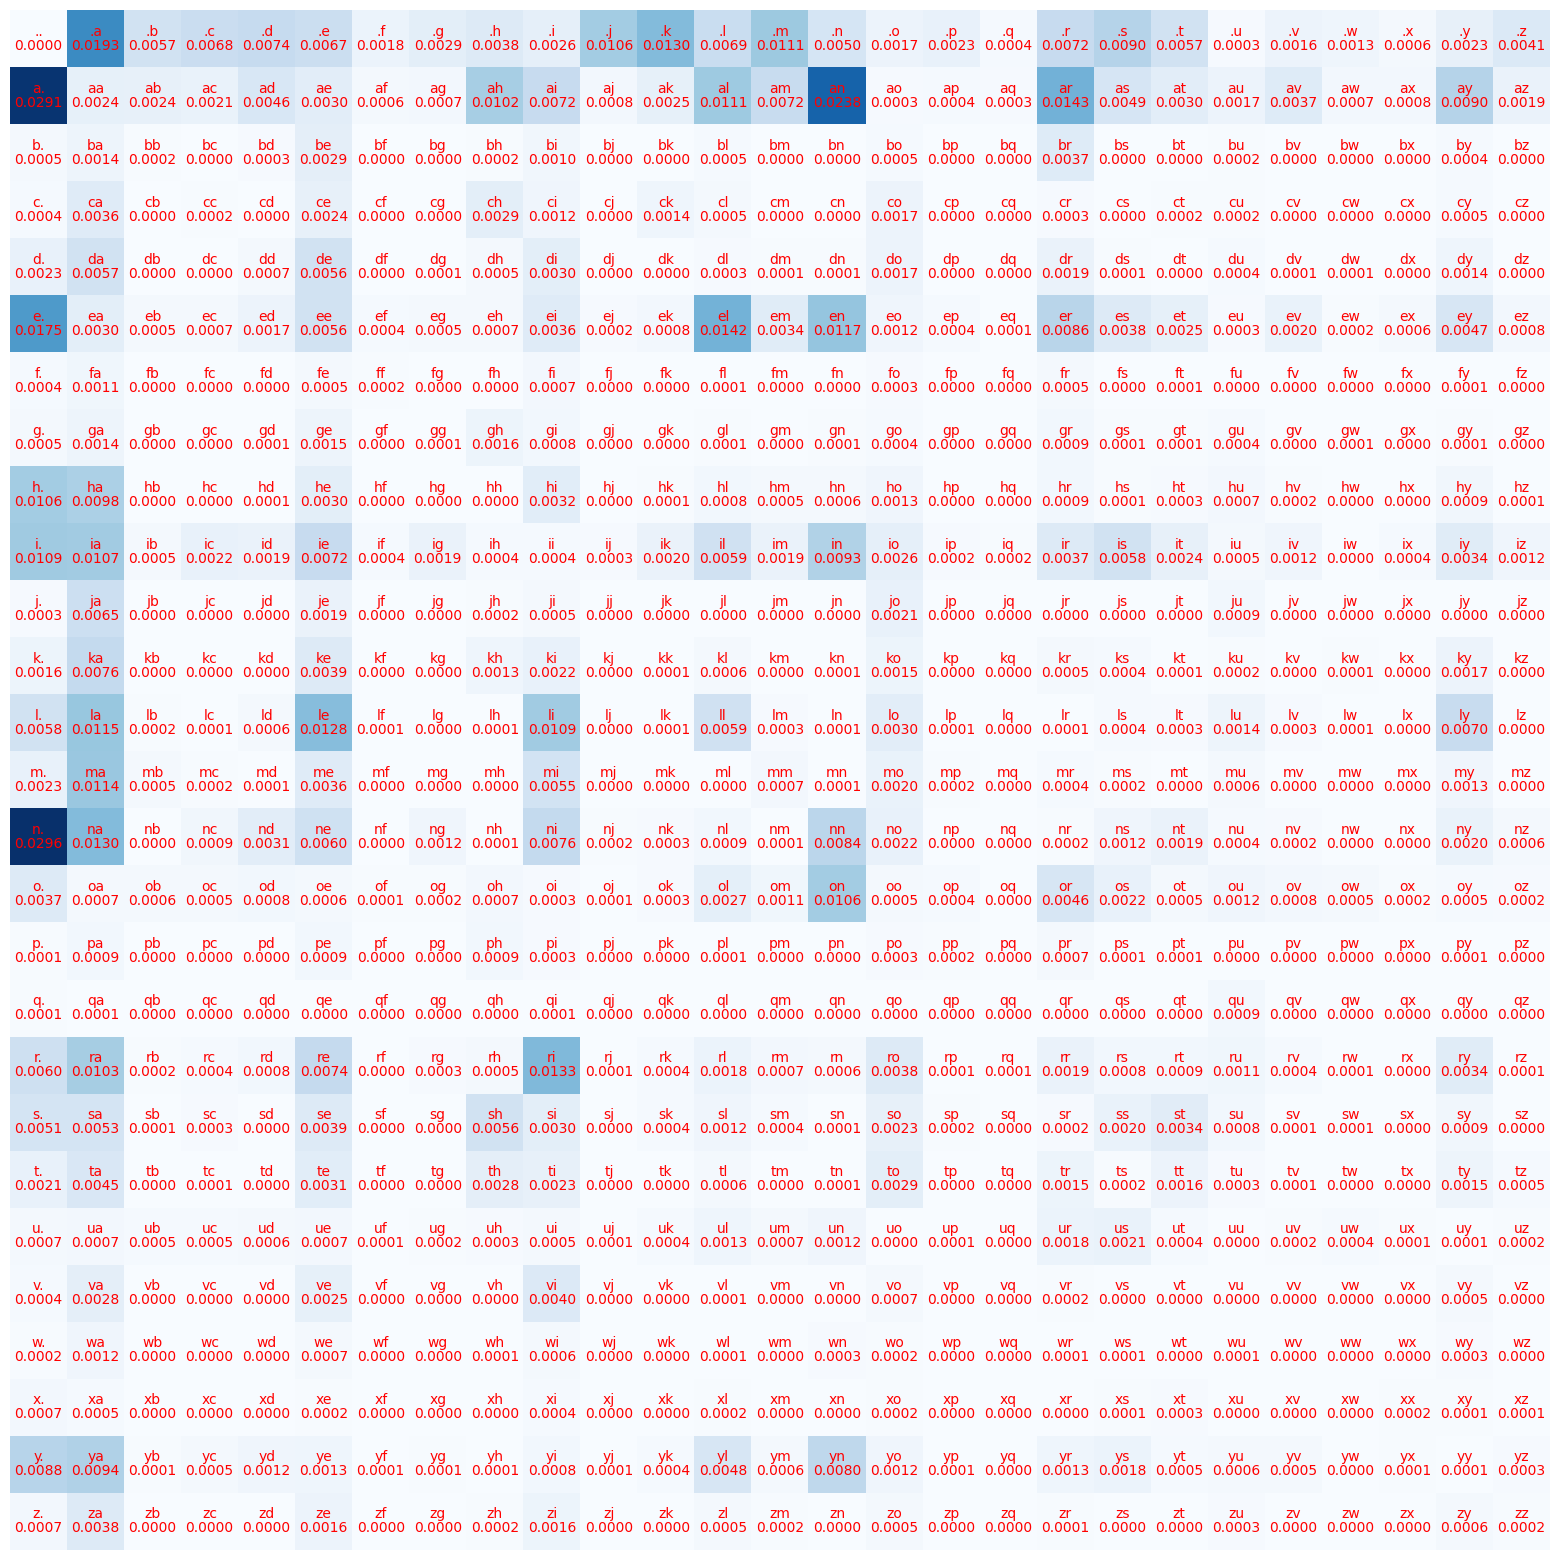

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(p, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='red')
        plt.text(j, i, "{:.4f}".format(p[i, j].item()), ha="center", va="top", color='red')
plt.axis('off')


In [23]:
p = (N+1).float() 
p /= p.sum(1, keepdim=True)


In [24]:
g = torch.Generator().manual_seed(2147483647)

ix = 0
for i in range(20):
    out = []

    while True:
        P = p[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(P, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break 
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [25]:
log_likelyhood = 0
n = 0

for w in ['yerdenjq']:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):  
        lx1 = stoi[ch1]
        lx2 = stoi[ch2]
        prob = p[lx1, lx2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n += 1
        print(f"{ch1}{ch2}: {prob}, {logprob}")

print(" ")
nll = -log_likelyhood
print(f'Log Likelyhood = {nll}')
print(f'Average Log Likelyhood = {nll / n}')


.y: 0.016718652099370956, -4.091230392456055
ye: 0.030806895345449448, -3.4800167083740234
er: 0.09579461812973022, -2.3455488681793213
rd: 0.014771745540201664, -4.215038776397705
de: 0.23248234391212463, -1.4589409828186035
en: 0.1308557391166687, -2.0336596965789795
nj: 0.0024517816491425037, -6.0109405517578125
jq: 0.0003416467516217381, -7.981733322143555
q.: 0.09698996692895889, -2.3331477642059326
 
Log Likelyhood = 33.95025634765625
Average Log Likelyhood = 3.7722506523132324


In [26]:
xs, ys = [], []

for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):  
        lx1 = stoi[ch1]
        lx2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(lx1)
        ys.append(lx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [27]:
g = torch.Generator().manual_seed(2147483647+1)

import torch.nn.functional as f
xenc = f.one_hot(xs, num_classes=27).float()
W = torch.randn((27, 27), generator=g)
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)


In [28]:


nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())



--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0049, 0.0959, 0.0281, 0.0703, 0.0961, 0.0573, 0.0241, 0.0135, 0.0093,
        0.1416, 0.0225, 0.0217, 0.0513, 0.0106, 0.0097, 0.0291, 0.0229, 0.0273,
        0.0325, 0.0275, 0.0446, 0.0501, 0.0214, 0.0093, 0.0120, 0.0354, 0.0310])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.05734505504369736
log likelihood: -2.858668565750122
negative log likelihood: 2.858668565750122
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0426, 0.0113, 0.0266, 0.0507, 0.2370, 0.0580, 0.0421, 0.0094, 0.0136,
        0.0297, 0.0044, 0.0782, 0.1028, 0.0146, 0.0172, 0.0288, 0.0263, 0.0319,
        0.0248, 0.0210, 0.0063, 0.0057, 0.0309, 0.0269, 0.0298, 0.0089, 0.0205])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [30]:
print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [39]:
xs[0]

tensor(0)

In [41]:


# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)



number of examples:  228146


In [46]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = f.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad


2.5577263832092285
2.5539438724517822
2.550442695617676
2.5471925735473633
2.5441699028015137
2.5413525104522705
2.538721799850464
2.536262273788452
2.5339579582214355
2.531797409057617
2.529768228530884
2.527860164642334
2.5260636806488037
2.5243709087371826
2.522773027420044
2.52126407623291
2.519836902618408
2.5184857845306396
2.5172054767608643
2.5159904956817627
2.5148375034332275
2.5137407779693604
2.51269793510437
2.511704921722412
2.5107579231262207
2.509854793548584
2.5089924335479736
2.5081686973571777
2.507380247116089
2.5066256523132324
2.5059030055999756
2.5052106380462646
2.5045461654663086
2.503908157348633
2.503295421600342
2.5027060508728027
2.5021398067474365
2.501594305038452
2.5010693073272705
2.500562906265259
2.5000758171081543
2.4996049404144287
2.4991507530212402
2.4987120628356934
2.49828839302063
2.4978790283203125
2.497483015060425
2.4970998764038086
2.4967291355133057
2.496370315551758
2.4960227012634277
2.4956860542297363
2.4953596591949463
2.49504327774047

In [48]:


# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = f.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))



junide.
janasah.
p.
cfay.
a.
